In [1]:
import os
import sys
import warnings
import logging

module_path = os.path.abspath('../src')
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from models.baseline_model import BaselineModel
from models.linear_model import LinearModel
from models.prophet_model import ProphetModel
from models.xgb_model import XGBModel
from models.lgb_model import LGBModel
from models.ensemble_model import EnsembleModel
from utils.preprocessor import Preprocessor
from utils.model_selection import back_test, grid_search

warnings.filterwarnings('ignore')
logging.getLogger('prophet').setLevel(logging.WARNING)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df_raw_scm = pd.read_csv('../data/scm_july16_feb20.csv', parse_dates=True, index_col='timestamp')
df_raw_scm.head()

,consumption
timestamp,
2016-07-22 00:00:00,414.582470
2016-07-22 00:30:00,416.992834
2016-07-22 01:00:00,677.312059
2016-07-22 01:30:00,703.826054
2016-07-22 02:00:00,715.877870


In [3]:
df_scm = df_raw_scm.loc['2019-07':'2019-08'].copy()

<AxesSubplot:xlabel='timestamp'>

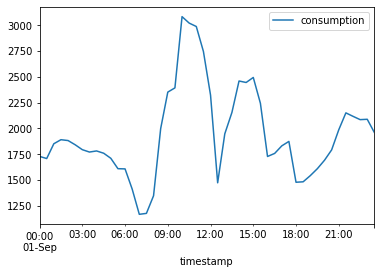

In [4]:
df_raw_scm['2019-09-01'].plot()

In [5]:
pp = Preprocessor(resample_freq='30min', na_th='2h', agg='mean')
df_scm_pp = pp.fit(df_scm).transform(df_scm)
df_scm_pp.head()

,y
ds,
2019-07-01 00:00:00,1420.640
2019-07-01 00:30:00,1464.768
2019-07-01 01:00:00,1796.544
2019-07-01 01:30:00,1996.848
2019-07-01 02:00:00,1915.328


In [6]:
pp_demo = Preprocessor(resample_freq='1h', na_th='2h', agg='mean')
df_scm_pp_demo = pp_demo.fit(df_scm).transform(df_scm)
df_scm_pp_demo.head()

,y
ds,
2019-07-01 00:00:00,1442.704
2019-07-01 01:00:00,1896.696
2019-07-01 02:00:00,1885.792
2019-07-01 03:00:00,1699.264
2019-07-01 04:00:00,1539.160


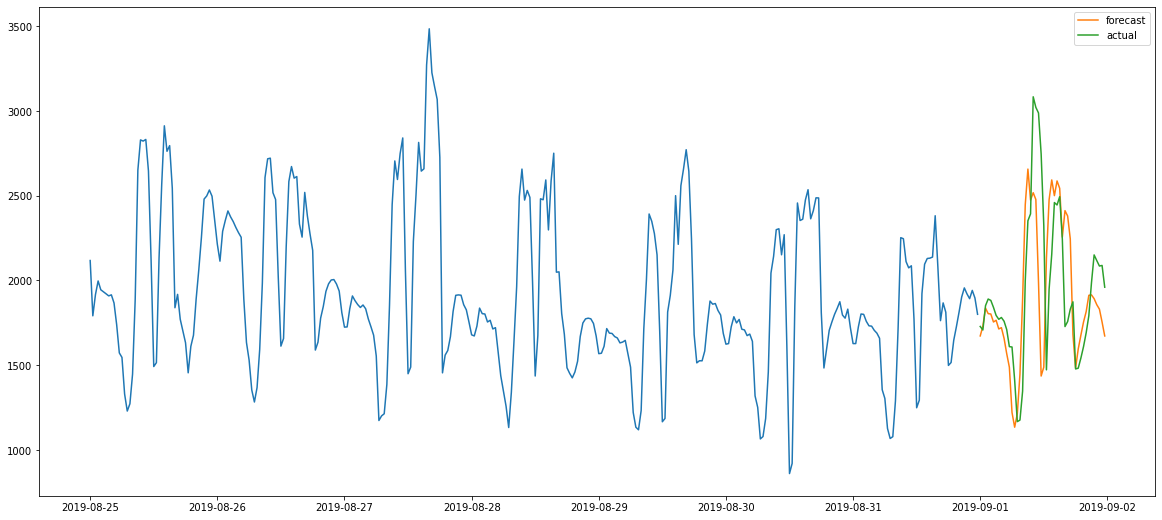

In [7]:
baseline = BaselineModel(freq='30min', horizon='1d')
res_baseline = baseline.fit(df_scm_pp).predict(df_scm_pp)
plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_baseline.index, res_baseline.values, label='forecast')
plt.plot(df_raw_scm['2019-09-01'].index, df_raw_scm['2019-09-01'].values, label='actual')
plt.legend()

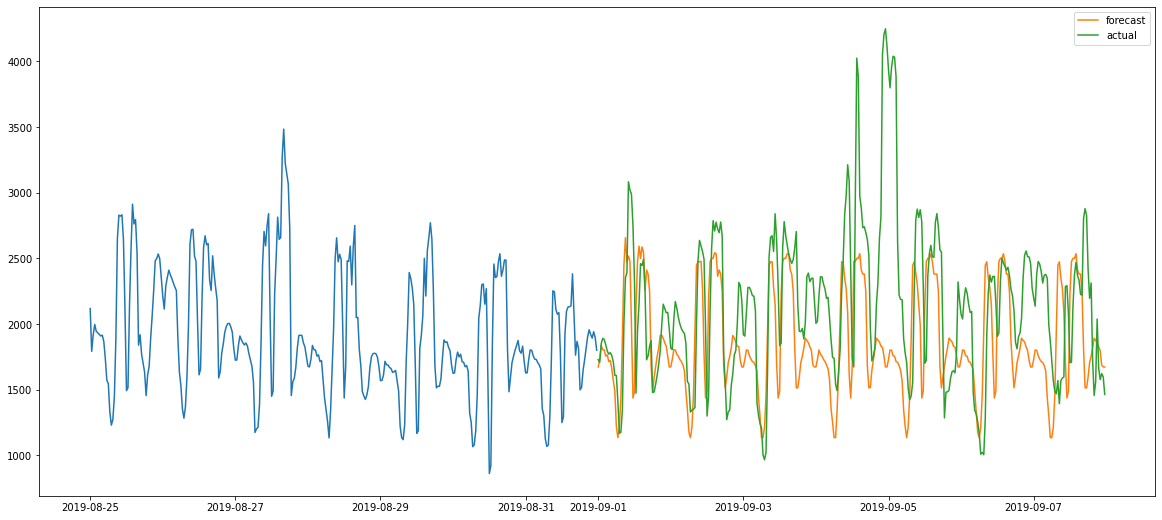

In [8]:
baseline_demo = BaselineModel(freq='30min', horizon='7d')
res_baseline_demo = baseline_demo.fit(df_scm_pp).predict(df_scm_pp)
plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_baseline_demo.index, res_baseline_demo.values, label='forecast')
plt.plot(df_raw_scm['2019-09-01':'2019-09-07'].index, df_raw_scm['2019-09-01':'2019-09-07'].values, label='actual')
plt.legend()

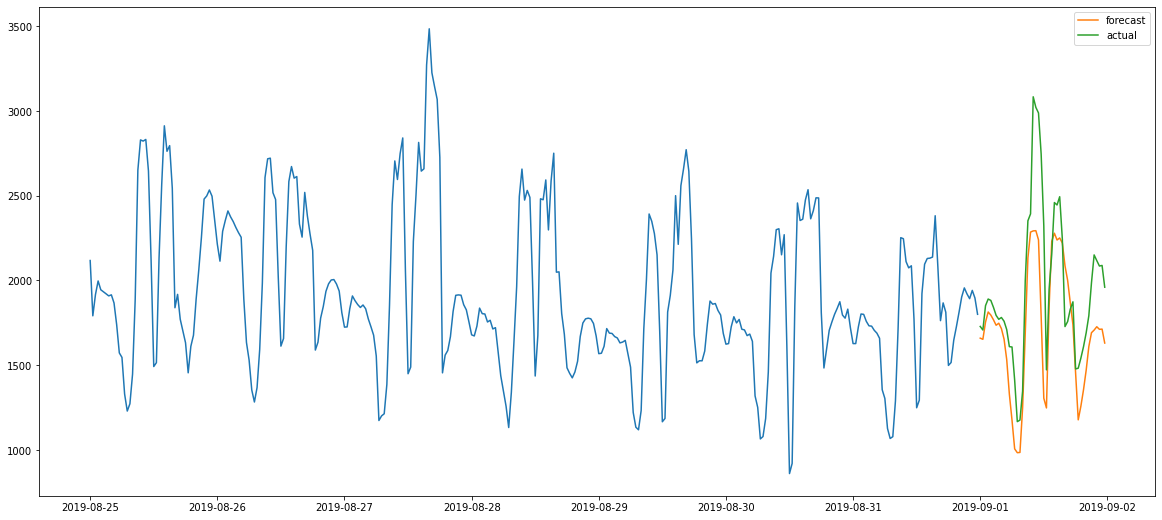

In [9]:
lasso = LinearModel(freq='30min', horizon='1d', cyclic_feature_encoding='onehot')
res_lasso = lasso.fit(df_scm_pp).predict(df_scm_pp)
plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_lasso.index, res_lasso.values, label='forecast')
plt.plot(df_raw_scm['2019-09-01'].index, df_raw_scm['2019-09-01'].values, label='actual')
plt.legend()

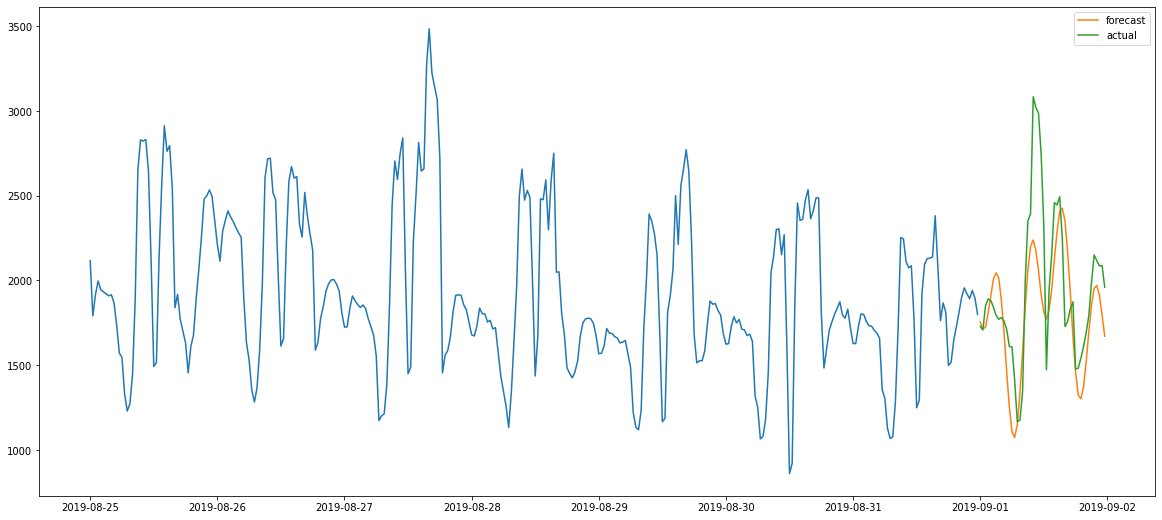

In [10]:
prophet = ProphetModel(freq='30min', horizon='1d', cyclic_feature_encoding='sincos')
res_prophet = prophet.fit(df_scm_pp).predict(df_scm_pp)

plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_prophet.index, res_prophet.values, label='forecast')
plt.plot(df_raw_scm['2019-09-01'].index, df_raw_scm['2019-09-01'].values, label='actual')
plt.legend()

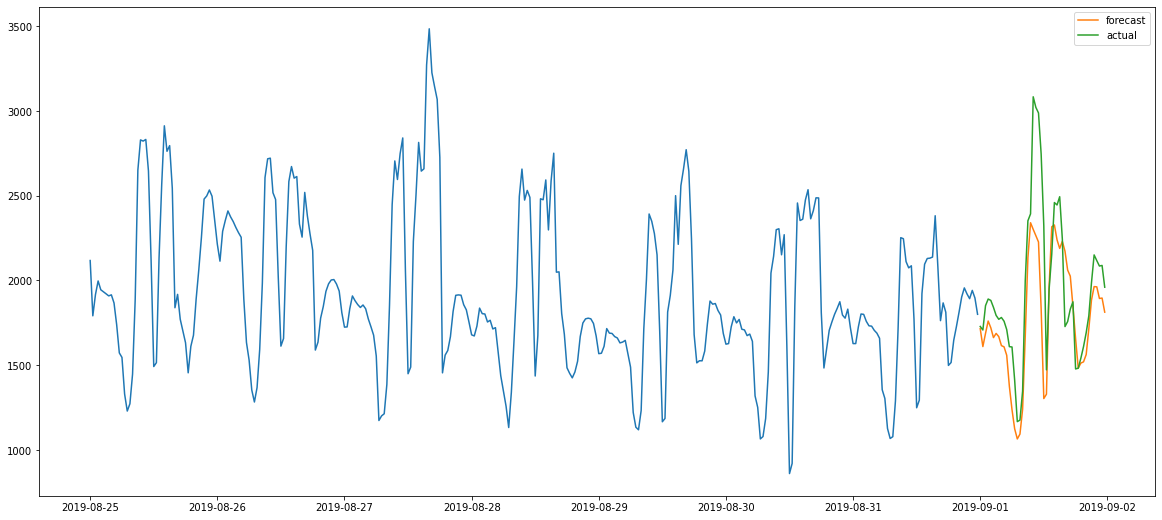

In [11]:
lgb = LGBModel(freq='30min', horizon='1d')
res_lgb = lgb.fit(df_scm_pp).predict(df_scm_pp)

plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_lgb.index, res_lgb.values, label='forecast')
plt.plot(df_raw_scm['2019-09-01'].index, df_raw_scm['2019-09-01'].values, label='actual')
plt.legend()

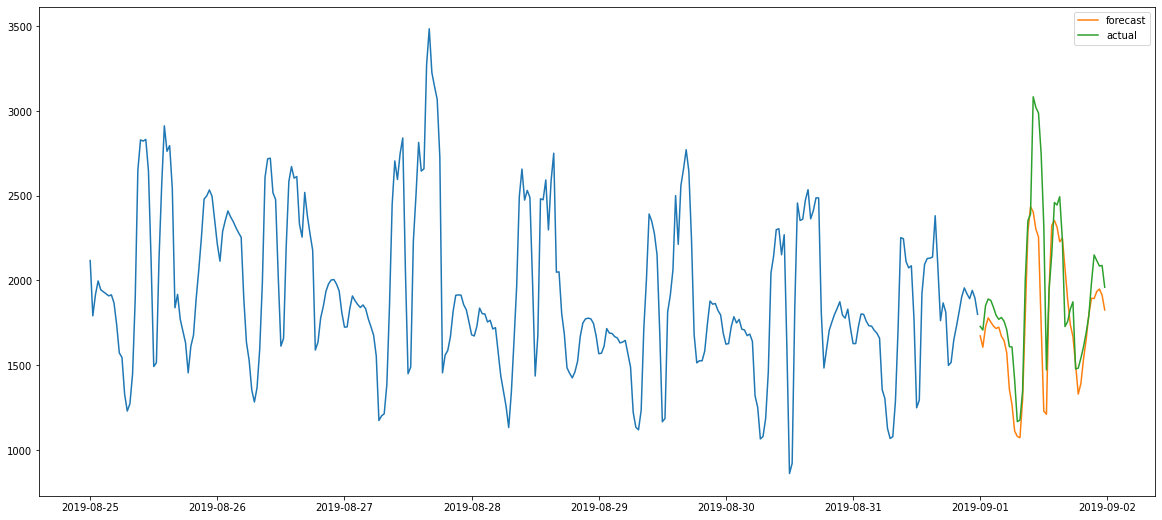

In [12]:
xgb = XGBModel(freq='30min', horizon='1d')
res_xgb = xgb.fit(df_scm_pp).predict(df_scm_pp)

plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_xgb.index, res_xgb.values, label='forecast')
plt.plot(df_raw_scm['2019-09-01'].index, df_raw_scm['2019-09-01'].values, label='actual')
plt.legend()

=====Linear model training completed=====
=====Prophet model training completed=====
=====LGB model training completed=====
=====Linear model forecasting completed=====
=====Prophet model forecasting completed=====
=====LGB model forecasting completed=====


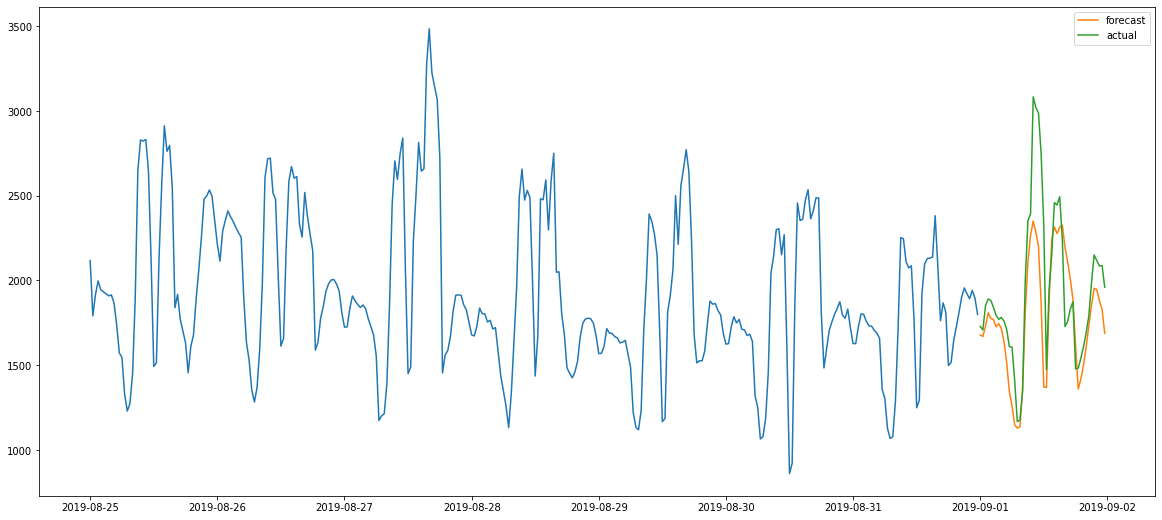

In [13]:
ensemble = EnsembleModel(freq='30min', horizon='1d', models=['Linear', 'Prophet', 'LGB'], ensemble_method='median')
res_ensemble = ensemble.fit(df_scm_pp).predict(df_scm_pp)

plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_ensemble.index, res_ensemble.values, label='forecast')
plt.plot(df_raw_scm['2019-09-01'].index, df_raw_scm['2019-09-01'].values, label='actual')
plt.legend()

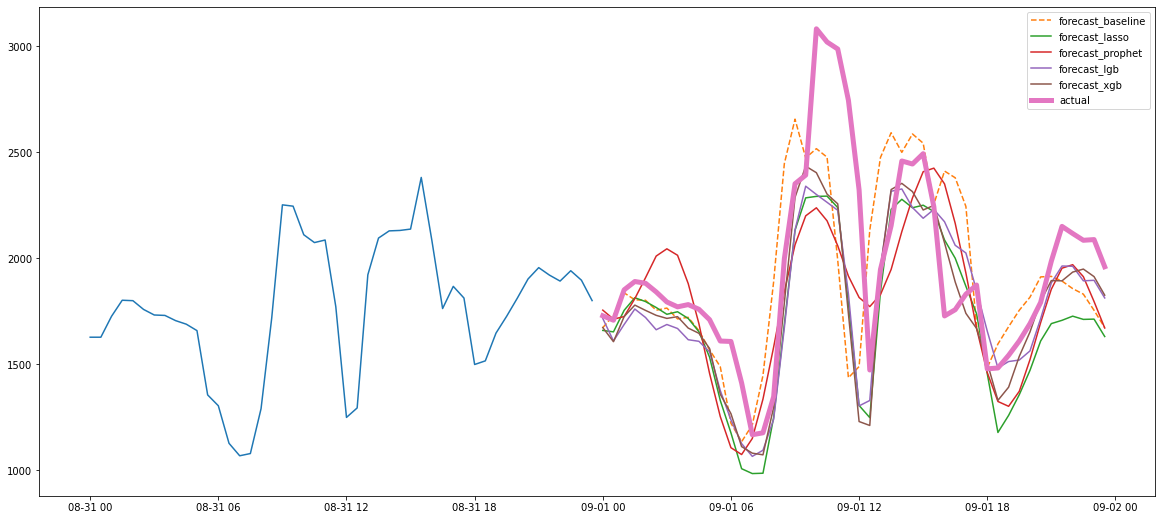

In [14]:
plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*1:].index, df_scm_pp.iloc[-48*1:].values)
plt.plot(res_baseline.index, res_baseline.values, linestyle='--', label='forecast_baseline')
plt.plot(res_lasso.index, res_lasso.values, label='forecast_lasso')
plt.plot(res_prophet.index, res_prophet.values, label='forecast_prophet')
plt.plot(res_lgb.index, res_lgb.values, label='forecast_lgb')
plt.plot(res_xgb.index, res_xgb.values, label='forecast_xgb')
plt.plot(df_raw_scm['2019-09-01'].index, df_raw_scm['2019-09-01'].values, linewidth=5, label='actual')
plt.legend()

In [15]:
baseline = BaselineModel(freq='30min', horizon='1d')
lasso = LinearModel(freq='30min', horizon='1d')
prophet = ProphetModel(freq='30min', horizon='1d')
lgb = LGBModel(freq='30min', horizon='1d')
xgb = XGBModel(freq='30min', horizon='1d')

res = []
for f in [baseline, lasso, prophet, lgb, xgb]:
    res_temp = back_test(f, df_scm_pp, test_size=0.05, stride='1d', retrain_stride=False)
    res_temp['model'] = f.name
    res.append(res_temp)
    print(f'===={f.name} model completed====')

pd.DataFrame(res).set_index('model')

====Baseline model completed====
====Linear model completed====
====Prophet model completed====
====LGB model completed====
====XGB model completed====


,rmse_mean,mse_mean,mae_mean,mape_mean,rmse_std,mse_std,mae_std,mape_std
model,,,,,,,,
Baseline,333.574993,111606.882919,246.545111,0.148897,22.403358,15229.276043,34.221740,0.018335
Linear,232.403077,55487.363396,172.851155,0.097232,47.055923,20750.618120,33.523756,0.011756
Prophet,272.817916,74707.214536,226.156099,0.129989,20.405855,11306.641118,24.415459,0.009601
LGB,200.573319,40902.859871,147.366620,0.083361,31.777437,12285.228323,14.629586,0.002189
XGB,240.598042,60726.416310,167.954057,0.091243,65.257164,29169.905677,36.459827,0.015786


In [16]:
lasso = LinearModel(freq='30min', horizon='1d')
params = {
    'alpha': [0.01, 0.1, 1],
    'cyclic_feature_encoding': ['sincos', 'onehot']
}
grid_search(lasso, params, df_scm_pp, test_size=0.05, stride='1d', retrain_stride=False)

100%|██████████| 6/6 [02:19<00:00, 23.30s/it]


,alpha,cyclic_feature_encoding,rmse_mean,mse_mean,mae_mean,mape_mean,rmse_std,mse_std,mae_std,mape_std
0,0.01,sincos,201.996659,41768.049699,159.138145,0.092910,38.053897,15717.223769,29.612960,0.015129
1,0.01,onehot,271.349573,74347.638090,205.939734,0.118639,32.795905,17836.021983,27.927299,0.009497
2,0.10,sincos,195.470409,39322.696997,147.435792,0.083785,40.878161,16941.377106,30.220561,0.016048
3,0.10,onehot,232.403077,55487.363396,172.851155,0.097232,47.055923,20750.618120,33.523756,0.011756
4,1.00,sincos,180.799112,33076.886376,133.242733,0.079066,24.142309,8904.579583,29.382617,0.012655
5,1.00,onehot,185.974208,35071.281432,137.016727,0.081616,26.968743,9819.375485,28.548083,0.009600


In [17]:
lgb = LGBModel(freq='30min', horizon='1d')
params = {
    'cyclic_feature_encoding': ['sincos', 'onehot'],
    'num_leaves': [40, 80],
    'min_data_in_leaf': [10, 20]
}
grid_search(lgb, params, df_scm_pp, test_size=0.05, stride='1d', retrain_stride=False)

100%|██████████| 8/8 [03:29<00:00, 26.15s/it]


,cyclic_feature_encoding,num_leaves,min_data_in_leaf,rmse_mean,mse_mean,mae_mean,mape_mean,rmse_std,mse_std,mae_std,mape_std
0,sincos,40,10,181.168723,33553.421598,143.864256,0.082983,33.120586,12514.280795,22.687975,0.010032
1,sincos,40,20,184.054717,34690.139687,142.529765,0.081397,34.942828,13066.187527,23.629619,0.011530
2,sincos,80,10,177.039313,31890.024928,132.213430,0.077625,28.647165,10606.875508,25.965540,0.015569
3,sincos,80,20,183.178613,35588.666422,142.663338,0.081836,55.239415,21569.259136,42.940937,0.020863
4,onehot,40,10,195.406472,39771.933896,137.985131,0.078987,48.809496,19837.900784,31.231077,0.012159
5,onehot,40,20,206.094889,43851.673319,152.883209,0.087416,45.440674,19699.736834,21.623504,0.009359
6,onehot,80,10,176.667940,31913.548074,131.917422,0.074989,32.449658,12001.016628,20.470016,0.006280
7,onehot,80,20,201.397518,41160.512006,150.308929,0.084172,29.988795,11690.236884,17.694727,0.004484


In [18]:
prophet = ProphetModel(freq='30min', horizon='1d')
params = {
    'cyclic_feature_encoding': ['sincos', 'onehot'],
    'growth': ['linear', 'logistic'],
    'seasonality_mode': ['additive', 'multiplicative']
}
grid_search(prophet, params, df_scm_pp, test_size=0.05, stride='1d', retrain_stride=False)

100%|██████████| 8/8 [00:55<00:00,  6.95s/it]


,cyclic_feature_encoding,growth,seasonality_mode,rmse_mean,mse_mean,mae_mean,mape_mean,rmse_std,mse_std,mae_std,mape_std
0,sincos,linear,additive,323.762072,104961.933176,253.531121,0.158150,14.494157,9324.084536,20.833564,0.005982
1,sincos,linear,multiplicative,322.474840,104198.344474,252.474495,0.156326,17.677186,11348.559579,22.372885,0.006939
2,sincos,logistic,additive,420.306672,178329.891149,361.662193,0.223455,50.082820,42518.319896,56.319594,0.028214
3,sincos,logistic,multiplicative,489.871973,244238.916319,413.063132,0.242673,79.978431,80309.132016,64.686422,0.029737
4,onehot,linear,additive,272.817916,74707.214536,226.156099,0.129989,20.405855,11306.641118,24.415459,0.009601
5,onehot,linear,multiplicative,276.775430,78842.504030,227.105764,0.128866,57.937884,33991.377148,57.819996,0.030450
6,onehot,logistic,additive,411.377555,171789.990148,375.246827,0.220382,61.949545,52872.131863,67.175906,0.035584
7,onehot,logistic,multiplicative,564.654609,325606.988707,461.838003,0.248893,100.788100,118994.786923,82.084964,0.040031
